In [5]:
#pip install gudhi

In [6]:
#pip install fermat

In [7]:
from src.distance        import *
from src.datasets        import *
from mpl_toolkits        import mplot3d
from ripser              import Rips
from src.DTM_filtrations import *
import matplotlib.colors as colors

In [8]:
sample = np.loadtxt('data/data.txt')
out = np.loadtxt('data/out.txt')
data = np.concatenate((sample, out)) 

In [4]:
cmap = plt.get_cmap('Blues')
new_cmap = truncate_colormap(cmap, 0.4, 1)

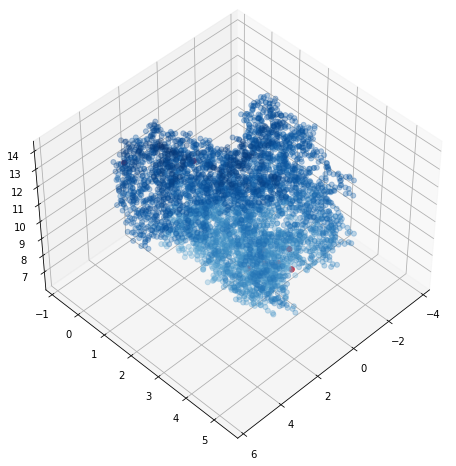

In [5]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.scatter(sample[:,0], sample[:,1], sample[:,2], s=25, alpha=0.3, c=sample[:,2], cmap=new_cmap)
ax.scatter(out[:,0], out[:,1], out[:,2], s=25, alpha=1, color='red')
ax.view_init(45,45)
plt.savefig('img/img1.png', dpi=300, bbox_inches='tight')
plt.show()

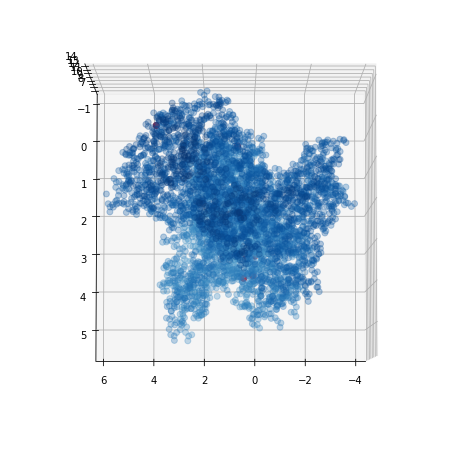

In [6]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.scatter(sample[:,0], sample[:,1], sample[:,2], s=35, alpha=0.3,  c=sample[:,2], cmap=new_cmap)
plt.savefig('img/img2.png', dpi=300, bbox_inches='tight')
ax.scatter(out[:,0], out[:,1], out[:,2], s=35, alpha=1, color='red')
ax.view_init(85,90)
plt.show()

__Presistance Diagram

We compare the output of teh computation of persistent homology for different choices of distance, and test its sensitivity to outliers.

**Euclidean Distance

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


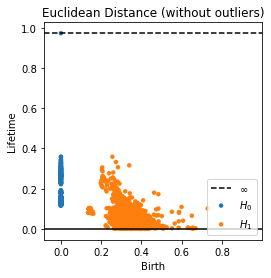

In [7]:
rips = Rips()
dgms = rips.fit_transform(sample)
rips.plot(dgms, lifetime=True)
plt.savefig('img/Euclidean_Distance_(without_outliers).png', dpi=300, bbox_inches='tight')
plt.title('Euclidean Distance (without outliers)');

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


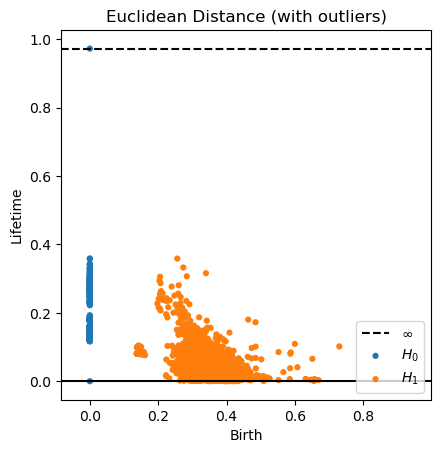

In [8]:
rips = Rips()
dgms = rips.fit_transform(data)
rips.plot(dgms, lifetime=True)
plt.savefig('img/Euclidean_Distance_(with_outliers).png', dpi=300, bbox_inches='tight')
plt.title('Euclidean Distance (with outliers)');

**K-NN distance

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


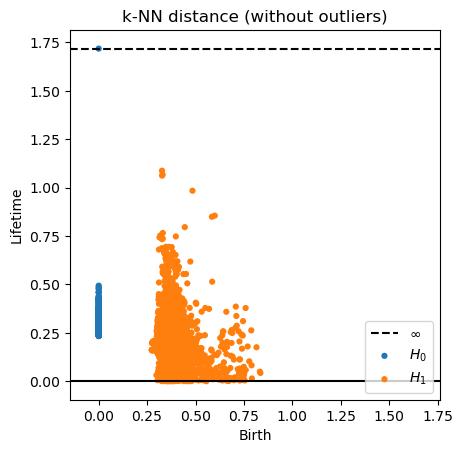

In [9]:
rips = Rips()
matrix = compute_kNN_distance(sample, 10)
dgms = rips.fit_transform(matrix, distance_matrix=True)
rips.plot(dgms, lifetime=True)
plt.savefig('img/k-NN_distance_(without_outliers).png', dpi=300, bbox_inches='tight')
plt.title('k-NN distance (without outliers)');

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


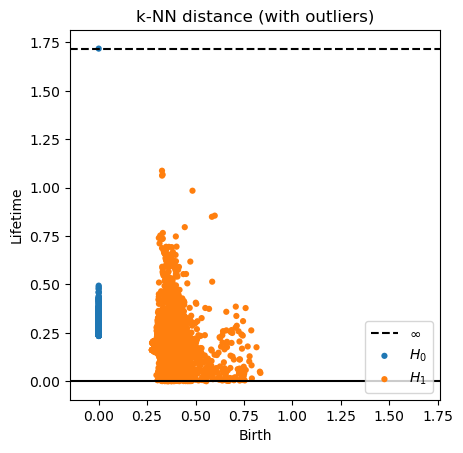

In [10]:
rips = Rips()
matrix = compute_kNN_distance(data, 10)
dgms = rips.fit_transform(matrix, distance_matrix=True)
rips.plot(dgms, lifetime=True)
plt.savefig('img/k-NN_distance_(with_outliers).png', dpi=300, bbox_inches='tight')
plt.title('k-NN distance (with outliers)');

**DTM

Text(0.5, 0.92, 'Values of the DTM on X with parameter m=0.01')

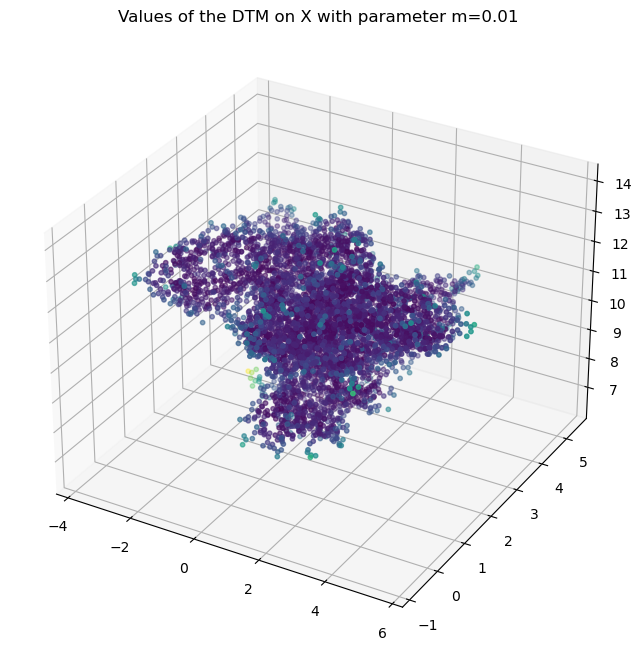

In [11]:
m = 0.01                   
DTM_values = DTM(data,data,m)             

# plot of the DTM
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=DTM_values, s = 10)
plt.savefig('img/Values-of-the-DTM-on-X-with-parameter_m=0.01.png', dpi=300, bbox_inches='tight')
ax.set_title('Values of the DTM on X with parameter m='+str(m))

Alpha Weighted Rips Complex is of dimension 2 - 116473 simplices - 4829 vertices. Filtration maximal value is inf.
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


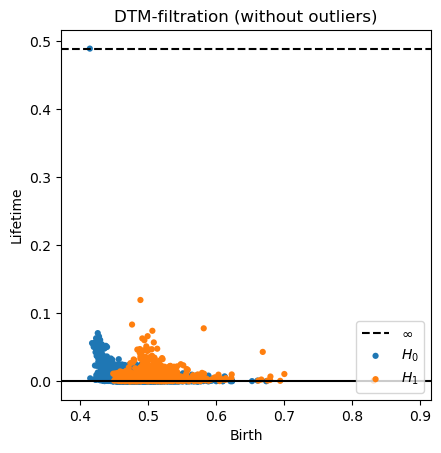

In [12]:
p = 2
dimension_max = 2

# compute the persistence diagram
simplex_tree_DTM_alpha = AlphaDTMFiltration(sample, m, p, dimension_max)
diagram_DTM_alpha = simplex_tree_DTM_alpha.persistence()    

# plot the persistence diagram
rips = Rips()
rips.plot(gudhi_to_ripser(diagram_DTM_alpha), lifetime = True)
plt.savefig('img/DTM-filtration_(without_outliers).png', dpi=300, bbox_inches='tight')
plt.title('DTM-filtration (without outliers)');

**Fermat Distance

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


<Figure size 432x288 with 0 Axes>

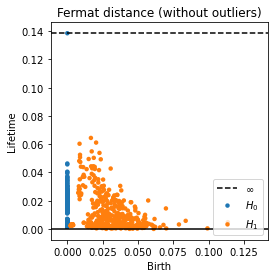

In [3]:
dgms = Fermat_dgm(sample, p=3, rescaled=False, title = 'Fermat distance (without outliers)')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


<Figure size 640x480 with 0 Axes>

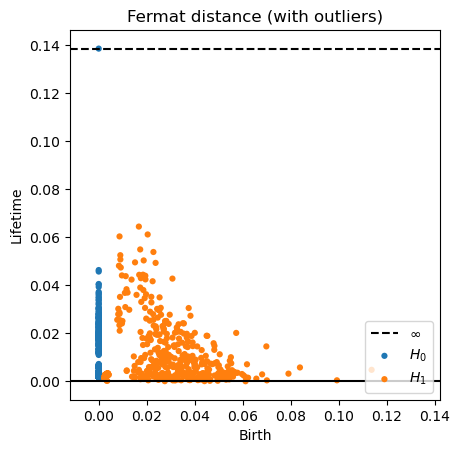

In [4]:
#plt.savefig('img/Fermat-distance_(with_outliers).png', dpi=300, bbox_inches='tight')
dgms = Fermat_dgm(data, p=3, rescaled=False, title = 'Fermat distance (with outliers)')

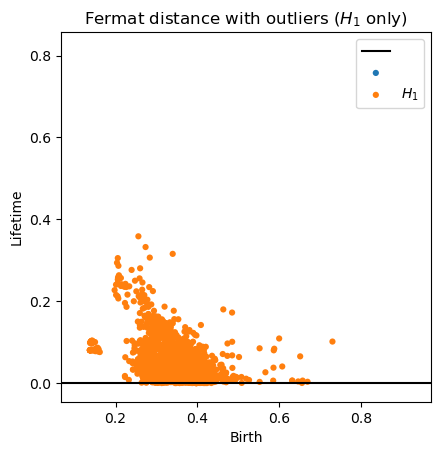

In [7]:
plt.savefig('img/Fermat-distance_(without_outliers($H_1$-only)).png', dpi=300, bbox_inches='tight')
#rips.plot([dgms[0][:0], dgms[1]], lifetime=True, title='Fermat distance with outliers ($H_1$ only)')
plt.legend(['', '', '$H_1$']);

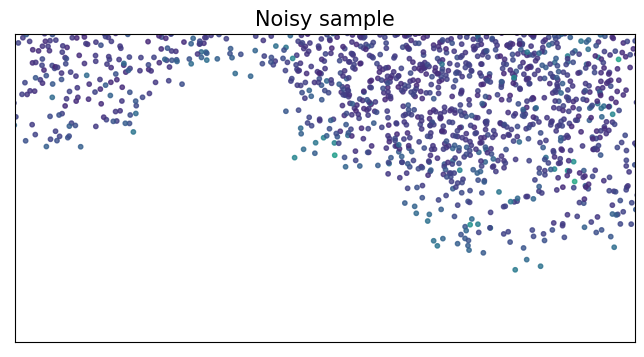

In [5]:
data1 = np.loadtxt('data/data.txt')
#data generated with the function eyeglasses(2000, 0, 'normal', 0.1)
#you can also generate different samples of the eyeglasses dataset with the function eyeglasses(n_obs, n_out, type_noise, var)

cmap = plt.get_cmap('viridis')
new_cmap = truncate_colormap(cmap, minval=0.1, maxval=0.9, n=100)

' Compute the DTM on the point cloud' 
m = 0.01      
DTM_values = DTM(data1,data1,m) 

# plot of the DTM
fig = plt.figure(figsize = (8,4))
plot=plt.scatter(data1[:,0], data1[:,1], c=DTM_values, s = 10, alpha = 0.8, cmap = new_cmap)
plt.xticks([])
plt.yticks([])
plt.axis([-3,3, -1.5, 1.5])
plt.savefig('img/Noisy_sample.png', dpi=300, bbox_inches='tight')
plt.title('Noisy sample', fontsize=15)
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


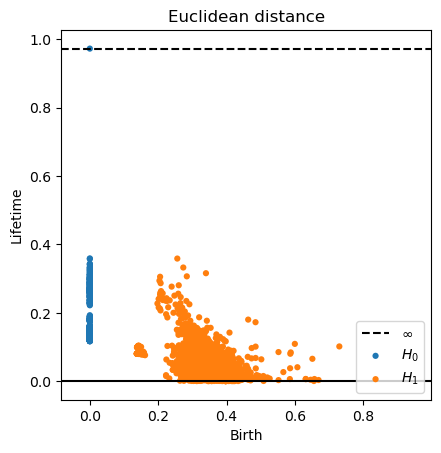

In [6]:
rips = Rips()
dgms = rips.fit_transform(data1)
rips.plot(dgms, lifetime=True)
plt.savefig('img/Noisy_sampleEuclidean-distance.png', dpi=300, bbox_inches='tight')
plt.title('Euclidean distance');